# Árboles de Regresión

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv("datasets/boston/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.shape

(506, 14)

In [4]:
col_names = data.columns.values.tolist()
predictors = col_names[:13]
target = col_names[13]
X = data[predictors]
Y = data[target]

In [5]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, max_depth=5, random_state=0)
regtree.fit(X,Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [6]:
preds = regtree.predict(data[predictors])

In [7]:
data["preds"] = preds

In [8]:
data [["preds", "medv"]]

,preds,medv
0,23.787500,24.0
1,23.787500,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,23.787500,22.4
502,23.787500,20.6
503,28.978261,23.9
504,31.170000,22.0


In [9]:
from sklearn import tree 

[Text(792.6136363636364, 1494.8999999999999, 'X[5] <= 6.941\nmse = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(443.8636363636364, 1223.1, 'X[12] <= 14.4\nmse = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(190.22727272727272, 951.3, 'X[12] <= 4.91\nmse = 26.009\nsamples = 255\nvalue = 23.35'),
 Text(126.81818181818181, 679.4999999999999, 'mse = 47.187\nsamples = 20\nvalue = 31.565'),
 Text(253.63636363636363, 679.4999999999999, 'X[12] <= 9.715\nmse = 17.974\nsamples = 235\nvalue = 22.651'),
 Text(126.81818181818181, 407.6999999999998, 'X[6] <= 87.6\nmse = 22.287\nsamples = 122\nvalue = 24.393'),
 Text(63.40909090909091, 135.89999999999986, 'mse = 11.111\nsamples = 112\nvalue = 23.787'),
 Text(190.22727272727272, 135.89999999999986, 'mse = 97.42\nsamples = 10\nvalue = 31.17'),
 Text(380.45454545454544, 407.6999999999998, 'X[10] <= 17.85\nmse = 6.503\nsamples = 113\nvalue = 20.77'),
 Text(317.0454545454545, 135.89999999999986, 'mse = 8.556\nsamples = 33\nvalue = 21.864'),
 Text(443.86

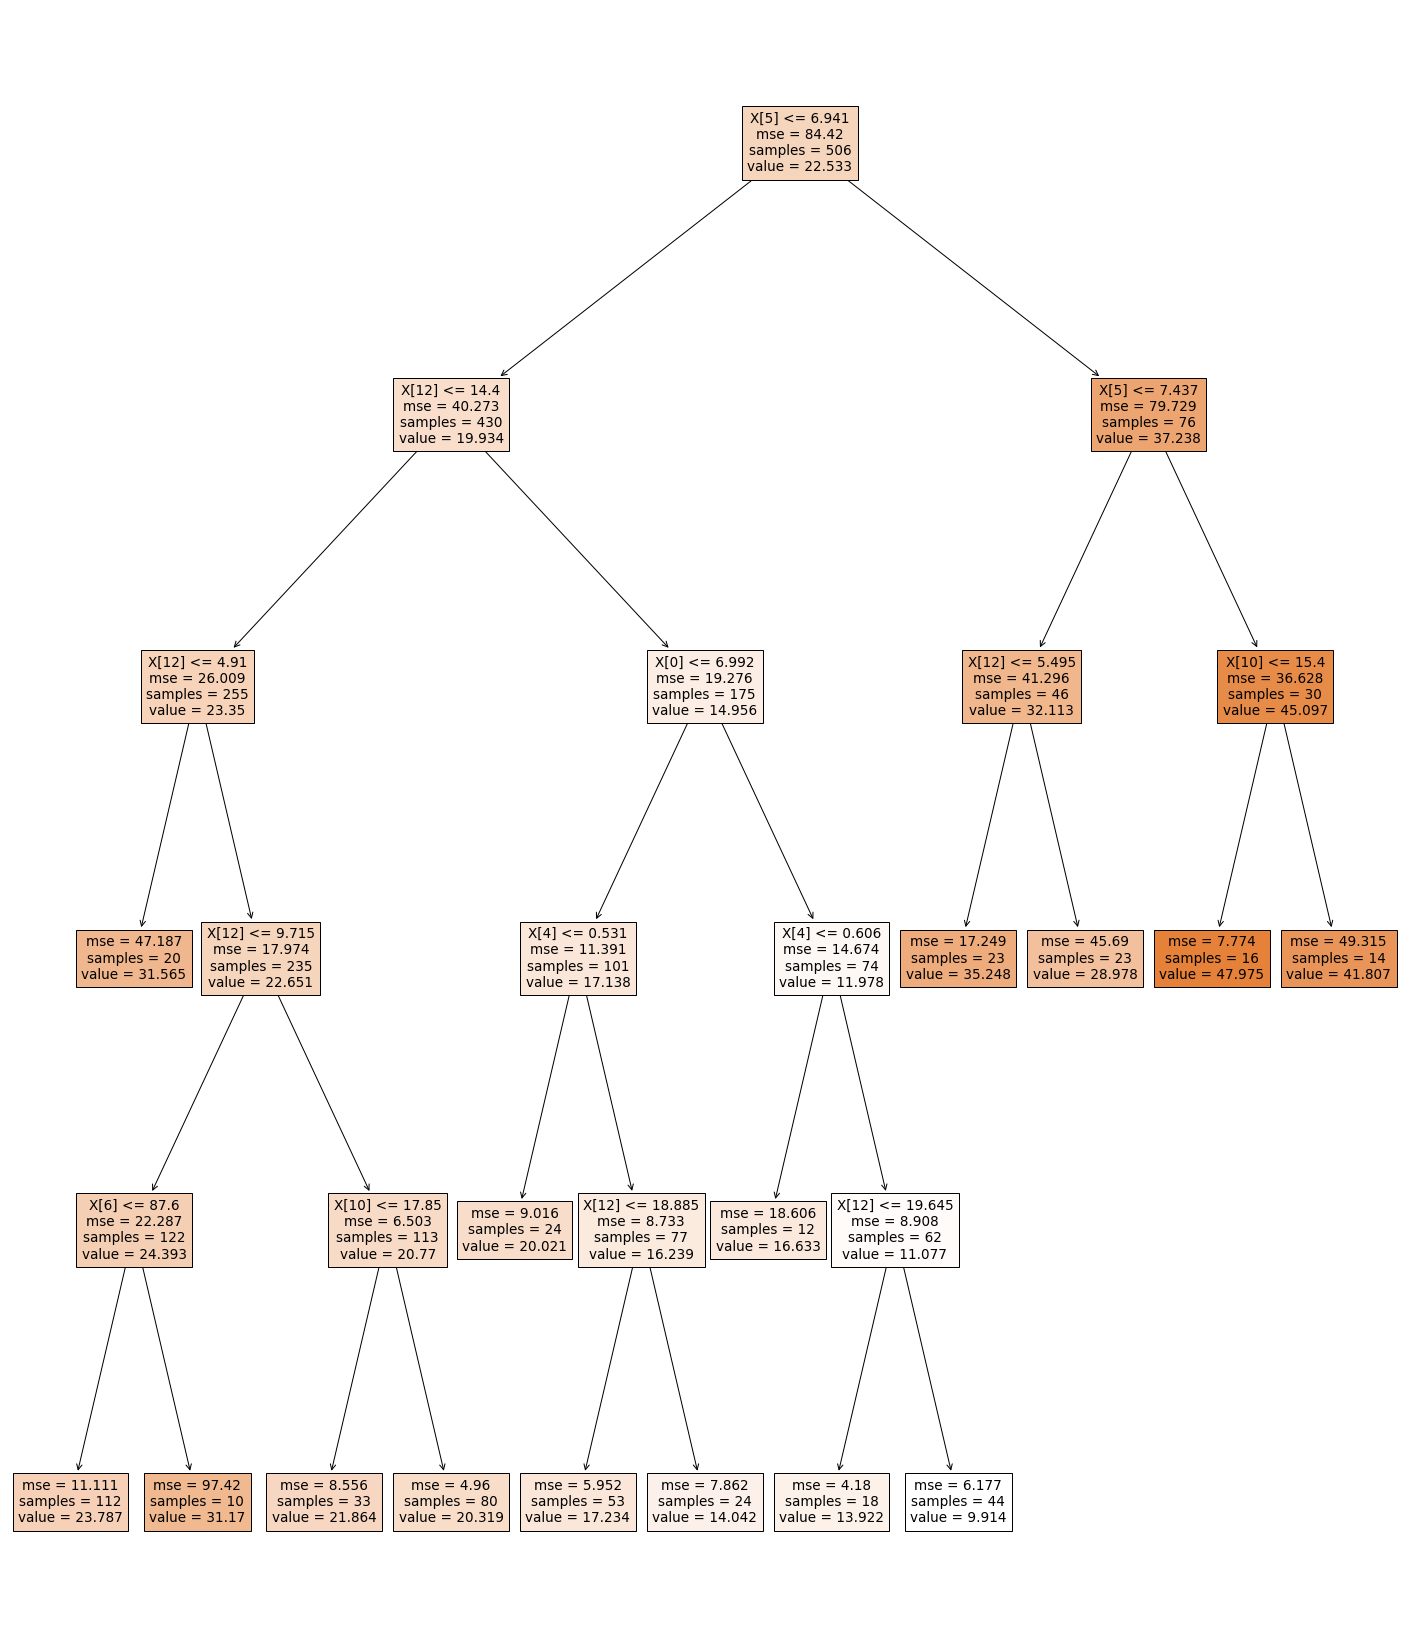

In [10]:
clf = regtree.fit(X,Y)
plt.figure(figsize=(25,30))
tree.plot_tree(clf, filled=True)  

In [11]:
col_names

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

# Validacion cruzada

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
import sklearn
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


In [14]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(regtree, X, Y, scoring="neg_mean_squared_error", cv = cv, n_jobs=1)
#scores = -scores
print(scores)
score = np.mean(scores)
print(score)

[-14.21501779 -16.62018743 -18.48312343 -46.22608214 -10.25202434
 -18.39546877 -15.08005674 -32.23929702 -23.04375075 -10.93761052]
-20.54926189262014


In [15]:
list(zip(predictors,regtree.feature_importances_))

[('crim', 0.032184533425691254),
 ('zn', 0.0),
 ('indus', 0.0),
 ('chas', 0.0),
 ('nox', 0.016195328299152056),
 ('rm', 0.6341876193016562),
 ('age', 0.014165271650613091),
 ('dis', 0.0),
 ('rad', 0.0),
 ('tax', 0.0),
 ('ptratio', 0.009620458196377114),
 ('black', 0.0),
 ('lstat', 0.2936467891265104)]

In [16]:
#rm es la mas importante, luego lstat

# Bosque aleatorio

In [21]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [32]:
forest = rfr(n_jobs=2, oob_score=True, n_estimators=500)
forest.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=2, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
data["r-forest_pred"]=forest.oob_prediction_
data[["r-forest_pred", "medv", "preds"]]

,r-forest_pred,medv,preds
0,28.077540,24.0,23.787500
1,22.531792,21.6,23.787500
2,34.805699,34.7,35.247826
3,35.290960,33.4,35.247826
4,34.217919,36.2,35.247826
...,...,...,...
501,24.225806,22.4,23.787500
502,18.735079,20.6,23.787500
503,27.026425,23.9,28.978261
504,26.266169,22.0,31.170000


In [34]:
data["rforest_error2"] = (data["r-forest_pred"]- data["medv"])**2
sum(data["rforest_error2"])/len(data)

10.28130773798421

In [35]:
forest.oob_score_

0.8782117769138102